In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
ff_df = pd.read_csv("./amazon.csv", parse_dates=['date'])

In [3]:
ff_df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
ff_df.head()
ff_df["date"].unique()

array(['1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [5]:
ff_df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
print(f"Number of records: {ff_df.shape[0]}")
print(f"Number of attributes: {ff_df.shape[1]}")

Number of records: 6454
Number of attributes: 5


In [7]:
ff_df.memory_usage(index=False)

year      51632
state     51632
month     51632
number    51632
date      51632
dtype: int64

In [8]:
ff_df_duplicates = ff_df.duplicated(keep="first")

In [9]:
ff_df_duplicates[ff_df_duplicates == "True"]

Series([], dtype: bool)

In [10]:
ff_df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
ff_df.groupby(by="month").count()

,year,state,number,date
month,,,,
Abril,540,540,540,540
Agosto,540,540,540,540
Dezembro,513,513,513,513
Fevereiro,540,540,540,540
Janeiro,541,541,541,541
Julho,540,540,540,540
Junho,540,540,540,540
Maio,540,540,540,540
Mar�o,540,540,540,540


In [12]:
ff_df.loc[ff_df["month"] == "Abril", "month"] = "April"
ff_df.loc[ff_df["month"] == "Agosto", "month"] = "August"
ff_df.loc[ff_df["month"] == "Dezembro", "month"] = "December"
ff_df.loc[ff_df["month"] == "Fevereiro", "month"] = "February"
ff_df.loc[ff_df["month"] == "Janeiro", "month"] = "January"
ff_df.loc[ff_df["month"] == "Julho", "month"] = "July"
ff_df.loc[ff_df["month"] == "Junho", "month"] = "June"
ff_df.loc[ff_df["month"] == "Maio", "month"] = "May"
ff_df.loc[ff_df["month"] == "Mar�o", "month"] = "March"
ff_df.loc[ff_df["month"] == "Novembro", "month"] = "November"
ff_df.loc[ff_df["month"] == "Outubro", "month"] = "October"
ff_df.loc[ff_df["month"] == "Setembro", "month"] = "September"

In [13]:
ff_df.groupby(by="month").count()

,year,state,number,date
month,,,,
April,540,540,540,540
August,540,540,540,540
December,513,513,513,513
February,540,540,540,540
January,541,541,541,541
July,540,540,540,540
June,540,540,540,540
March,540,540,540,540
May,540,540,540,540


In [14]:
month_data = ff_df.groupby(by="month", as_index=False)["number"].sum()
month_data

,month,number
0,April,28188.770
1,August,88050.435
2,December,57535.480
3,February,30848.050
4,January,47747.844
5,July,92326.113
6,June,56010.675
7,March,30717.405
8,May,34731.363
9,November,85508.054


<AxesSubplot: xlabel='month', ylabel='number'>

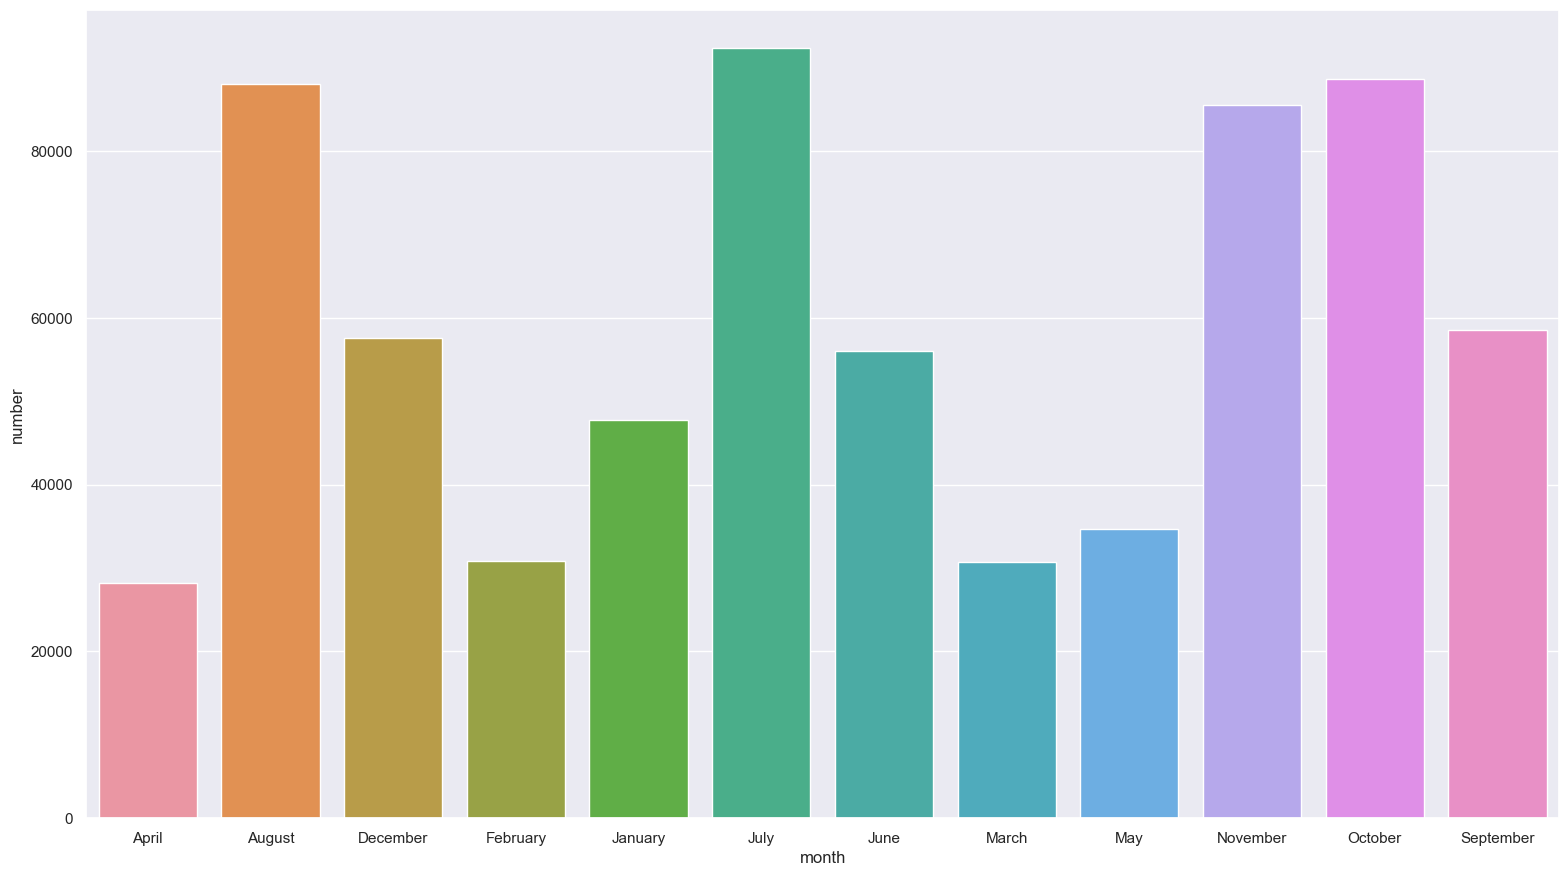

In [15]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=month_data, x="month", y="number")

In [16]:
year_data = ff_df.groupby(by="year", as_index=False)["number"].sum()
year_data

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


<AxesSubplot: xlabel='year', ylabel='number'>

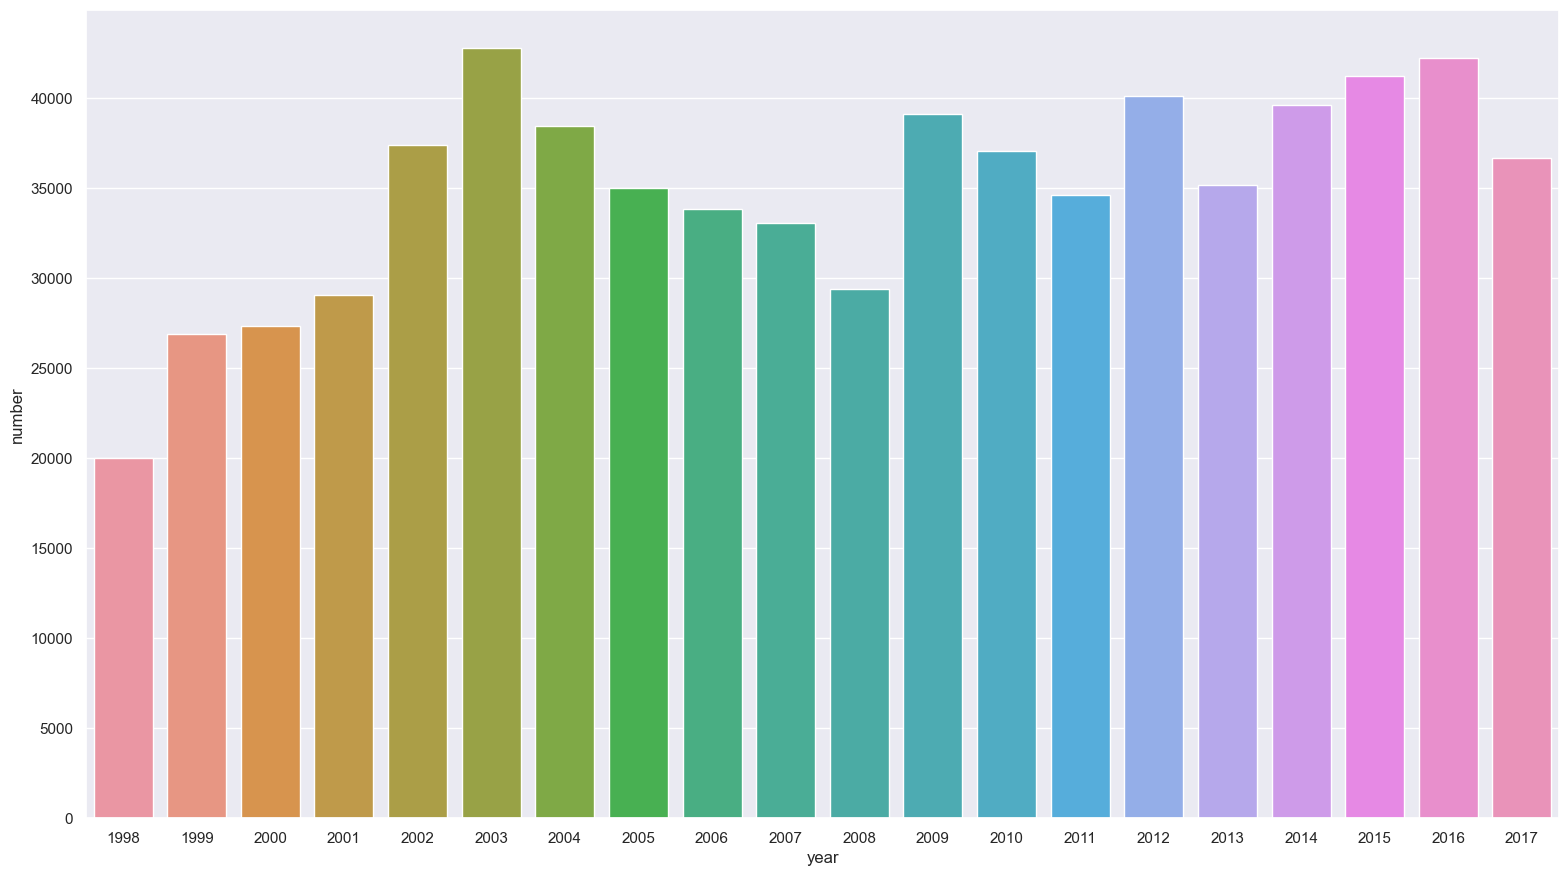

In [17]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=year_data, x="year", y="number")

In [18]:
state_data = ff_df.groupby(by="state", as_index=False)["number"].sum()
state_data

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<AxesSubplot: xlabel='state', ylabel='number'>

C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


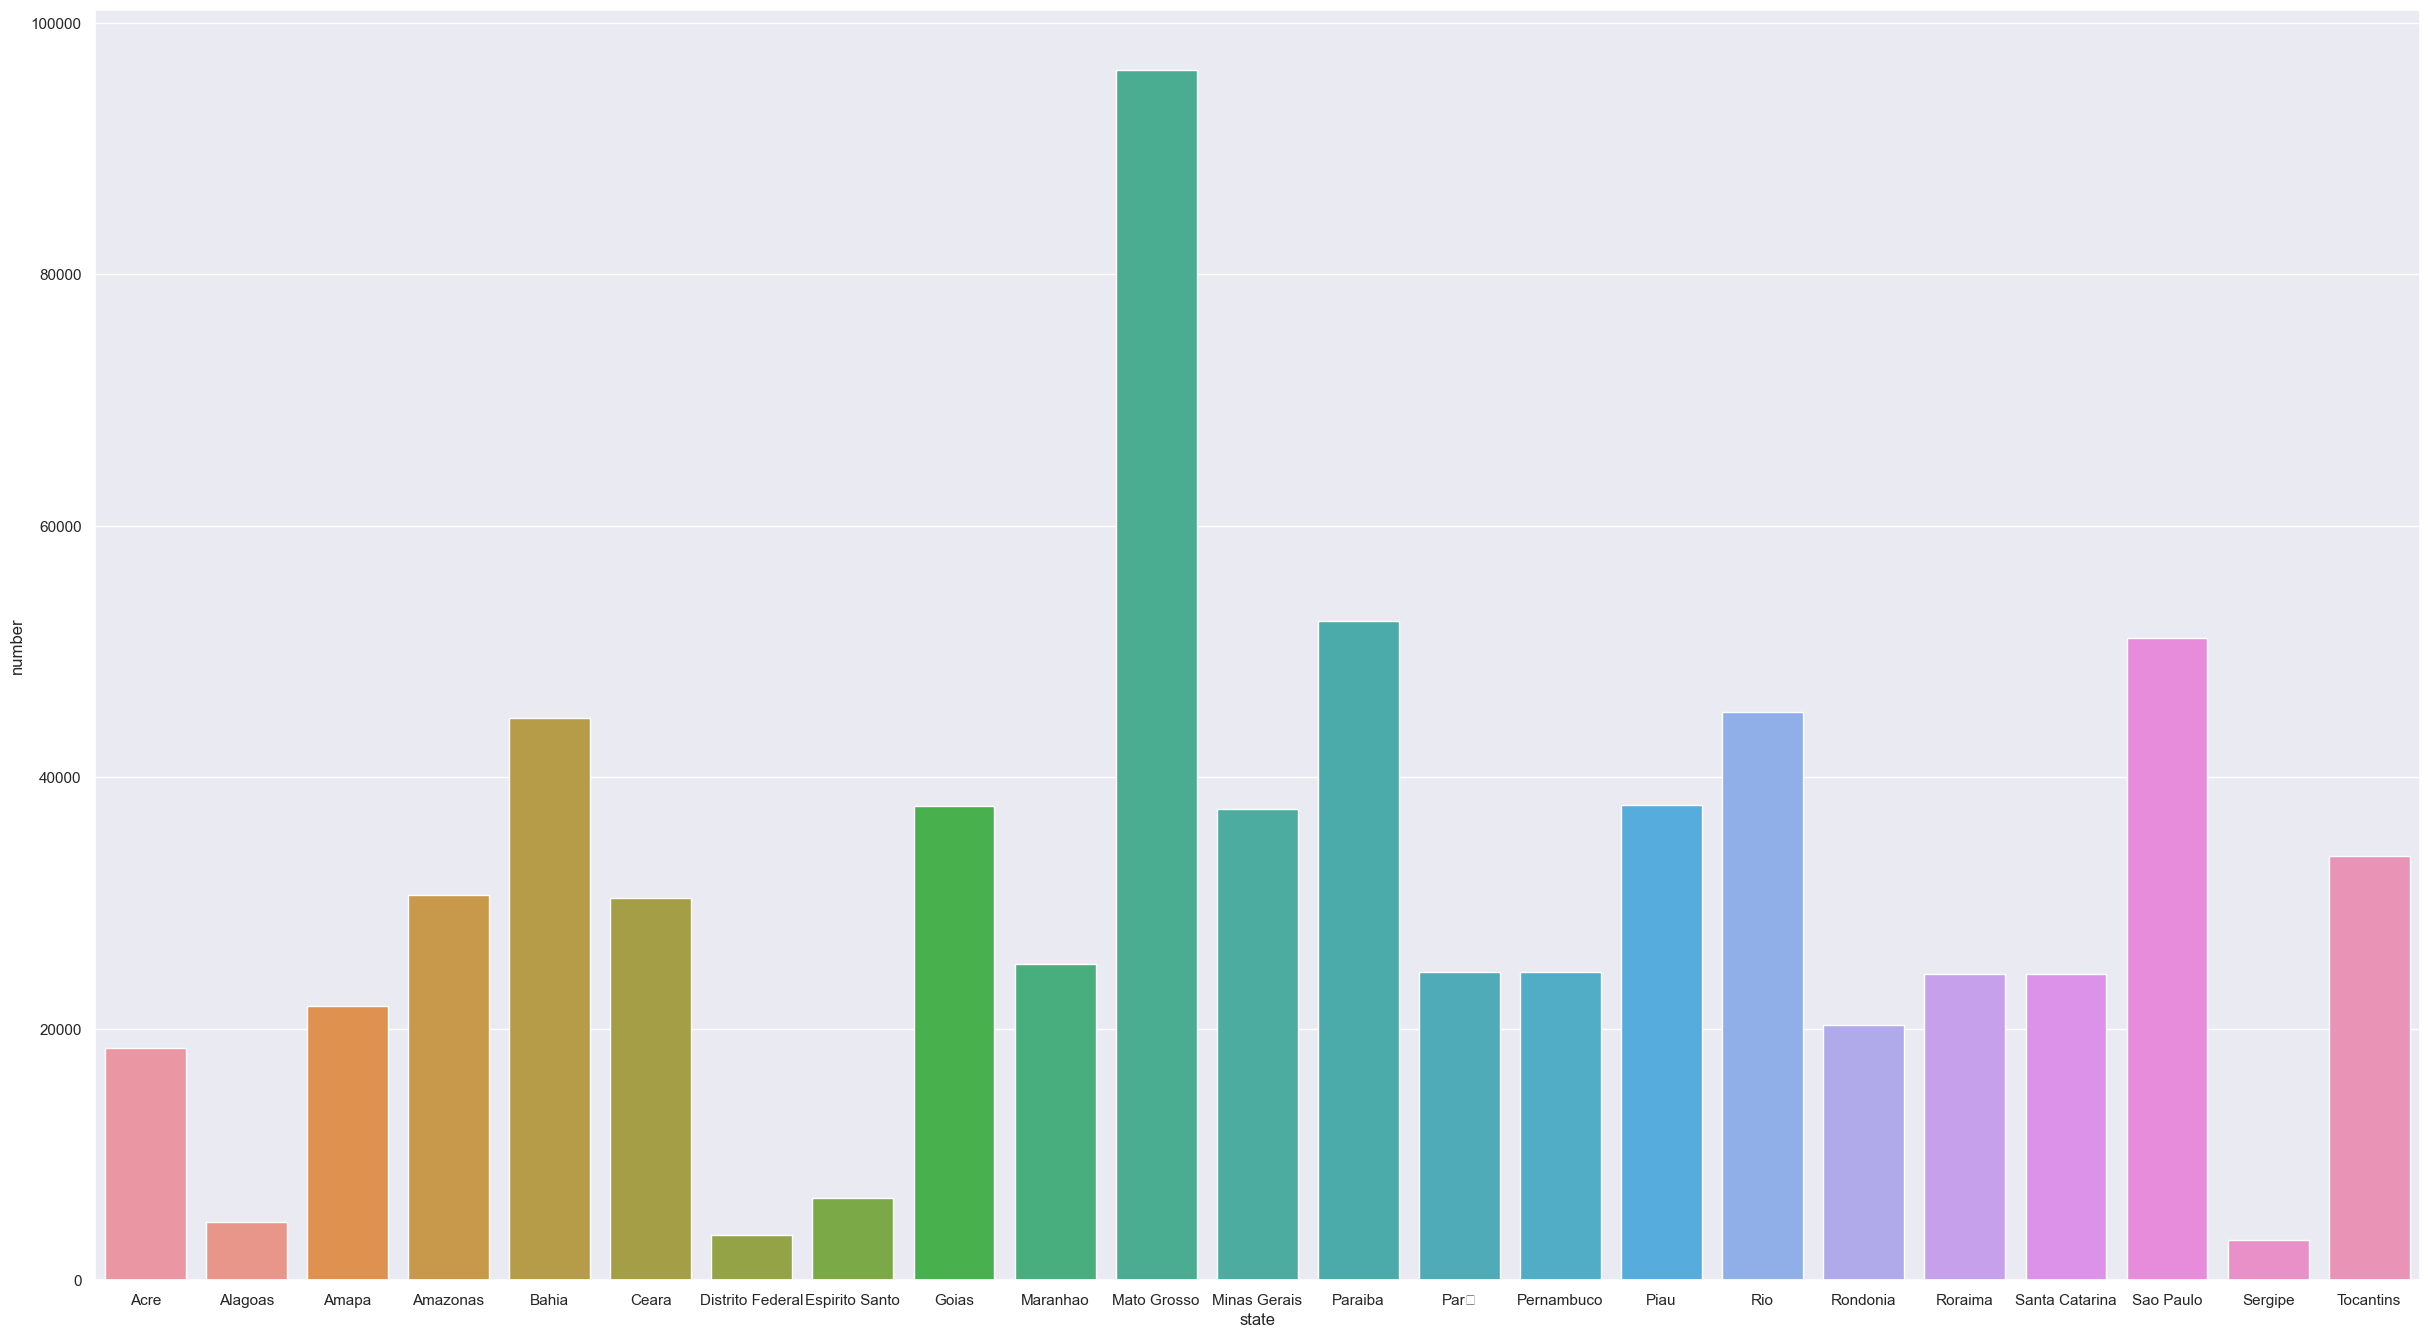

In [19]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=state_data, x="state", y="number")

In [20]:
state_data[state_data["state"] == "Amazonas"]

,state,number
3,Amazonas,30650.129


In [21]:
month_data_2015 = ff_df[ff_df["year"] == 2015].groupby(by="month", as_index=False)["number"].sum()
month_data_2015

,month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,February,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<AxesSubplot: xlabel='month', ylabel='number'>

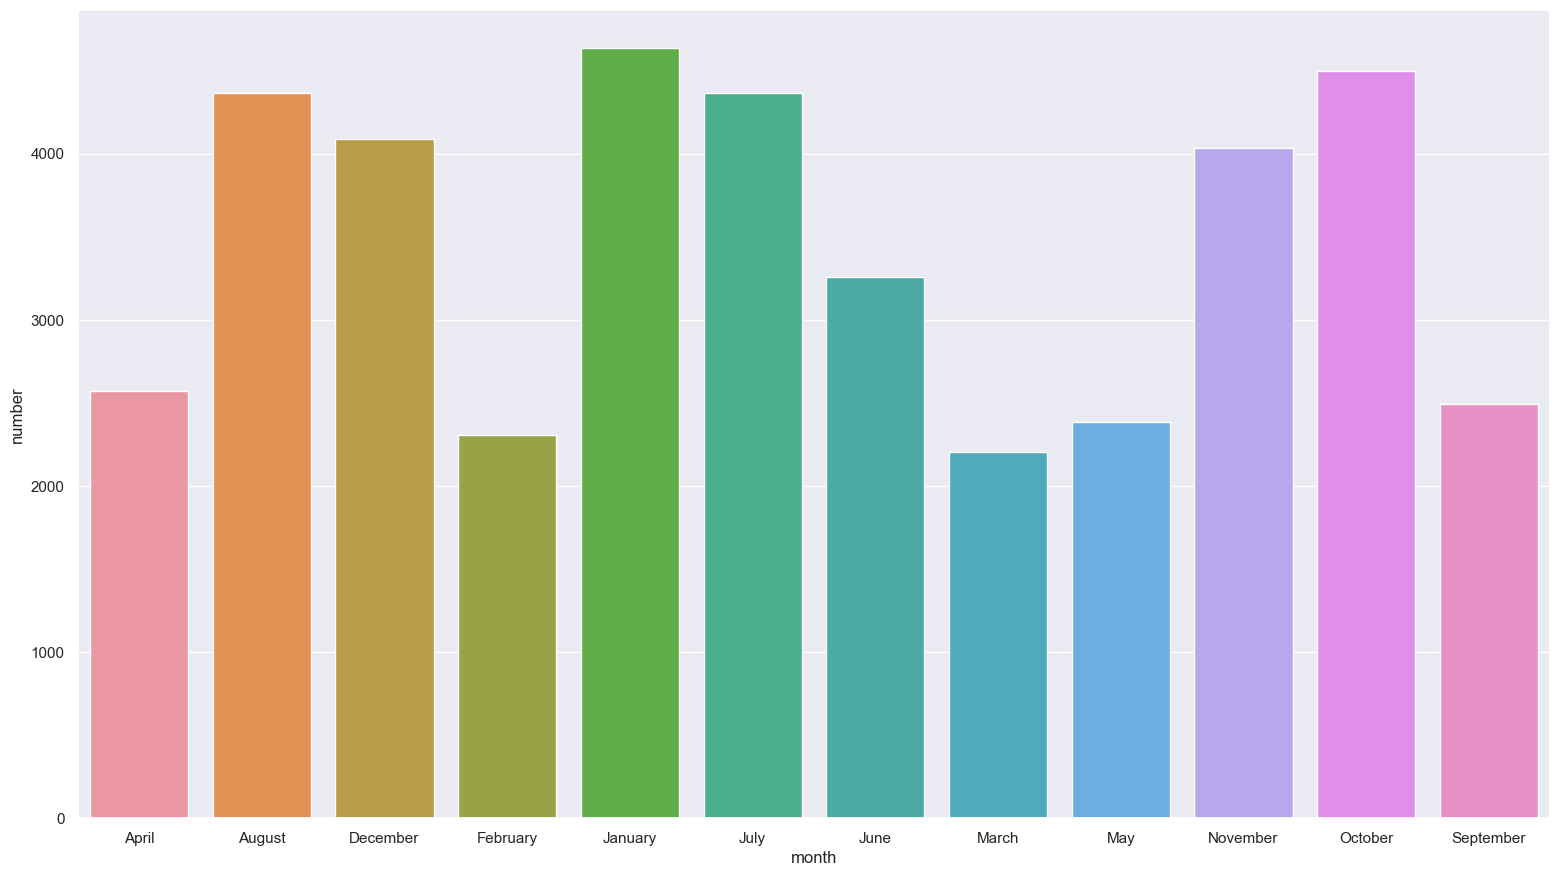

In [22]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.barplot(data=month_data_2015, x="month", y="number")

In [23]:
daily_data = ff_df.groupby(by="date", as_index=False)[["number"]].sum()
daily_data["date"].unique()

array(['1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

<AxesSubplot: xlabel='date', ylabel='number'>

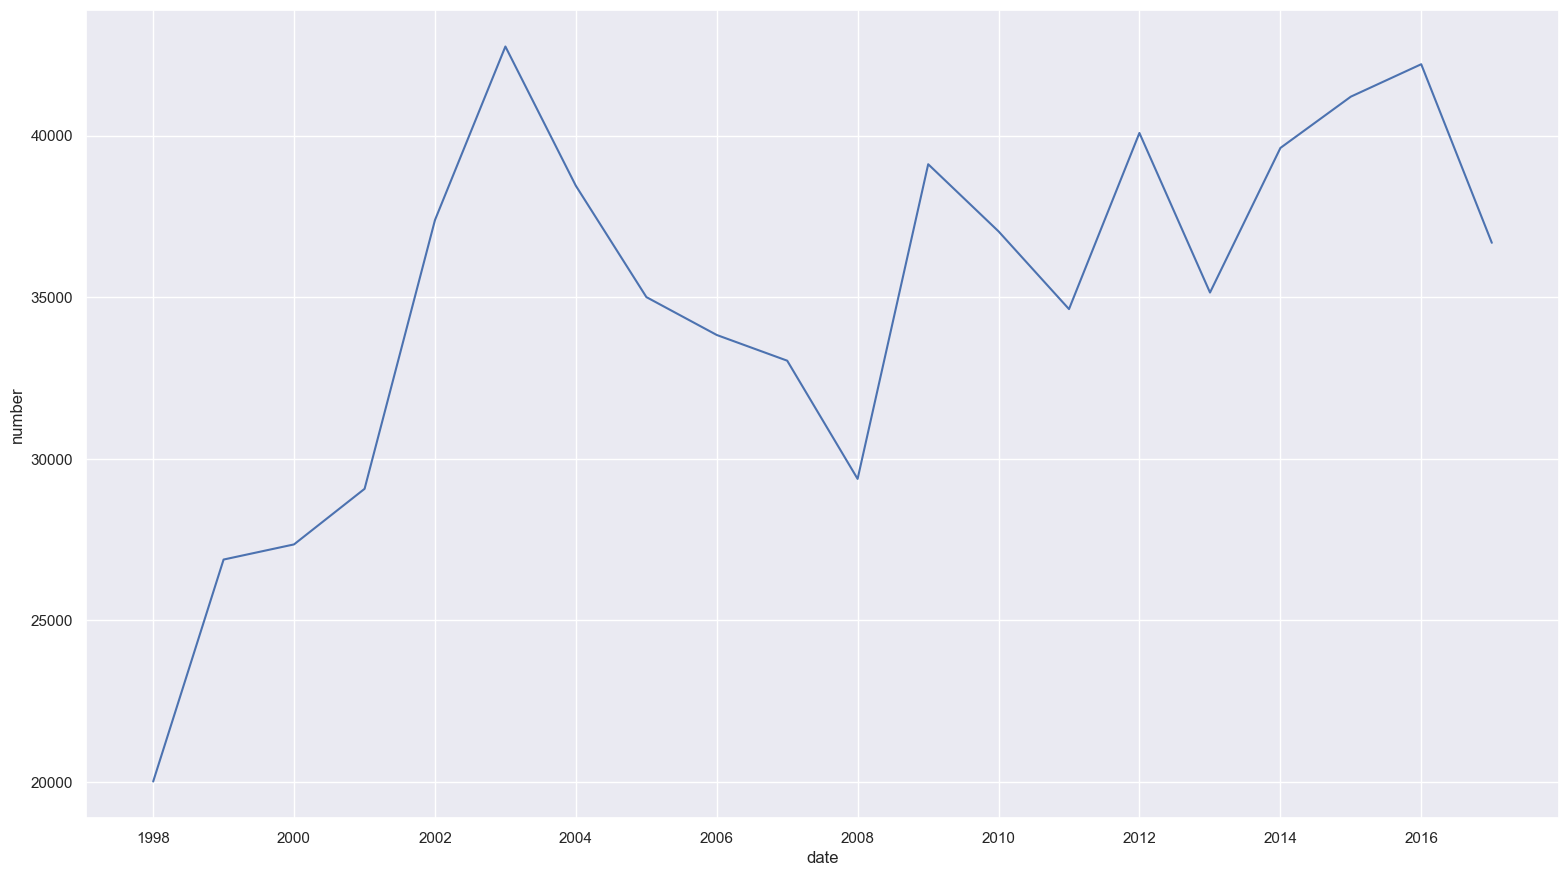

In [24]:
sns.set(rc={"figure.figsize":(19, 10.5)})
sns.lineplot(data=daily_data, x="date", y="number")

In [25]:
dec_data = ff_df[ff_df["month"] == "December"].groupby(by="state", as_index=False)[["number"]].sum()
dec_data["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Paraiba', 'Par�', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

<AxesSubplot: xlabel='state', ylabel='number'>

C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


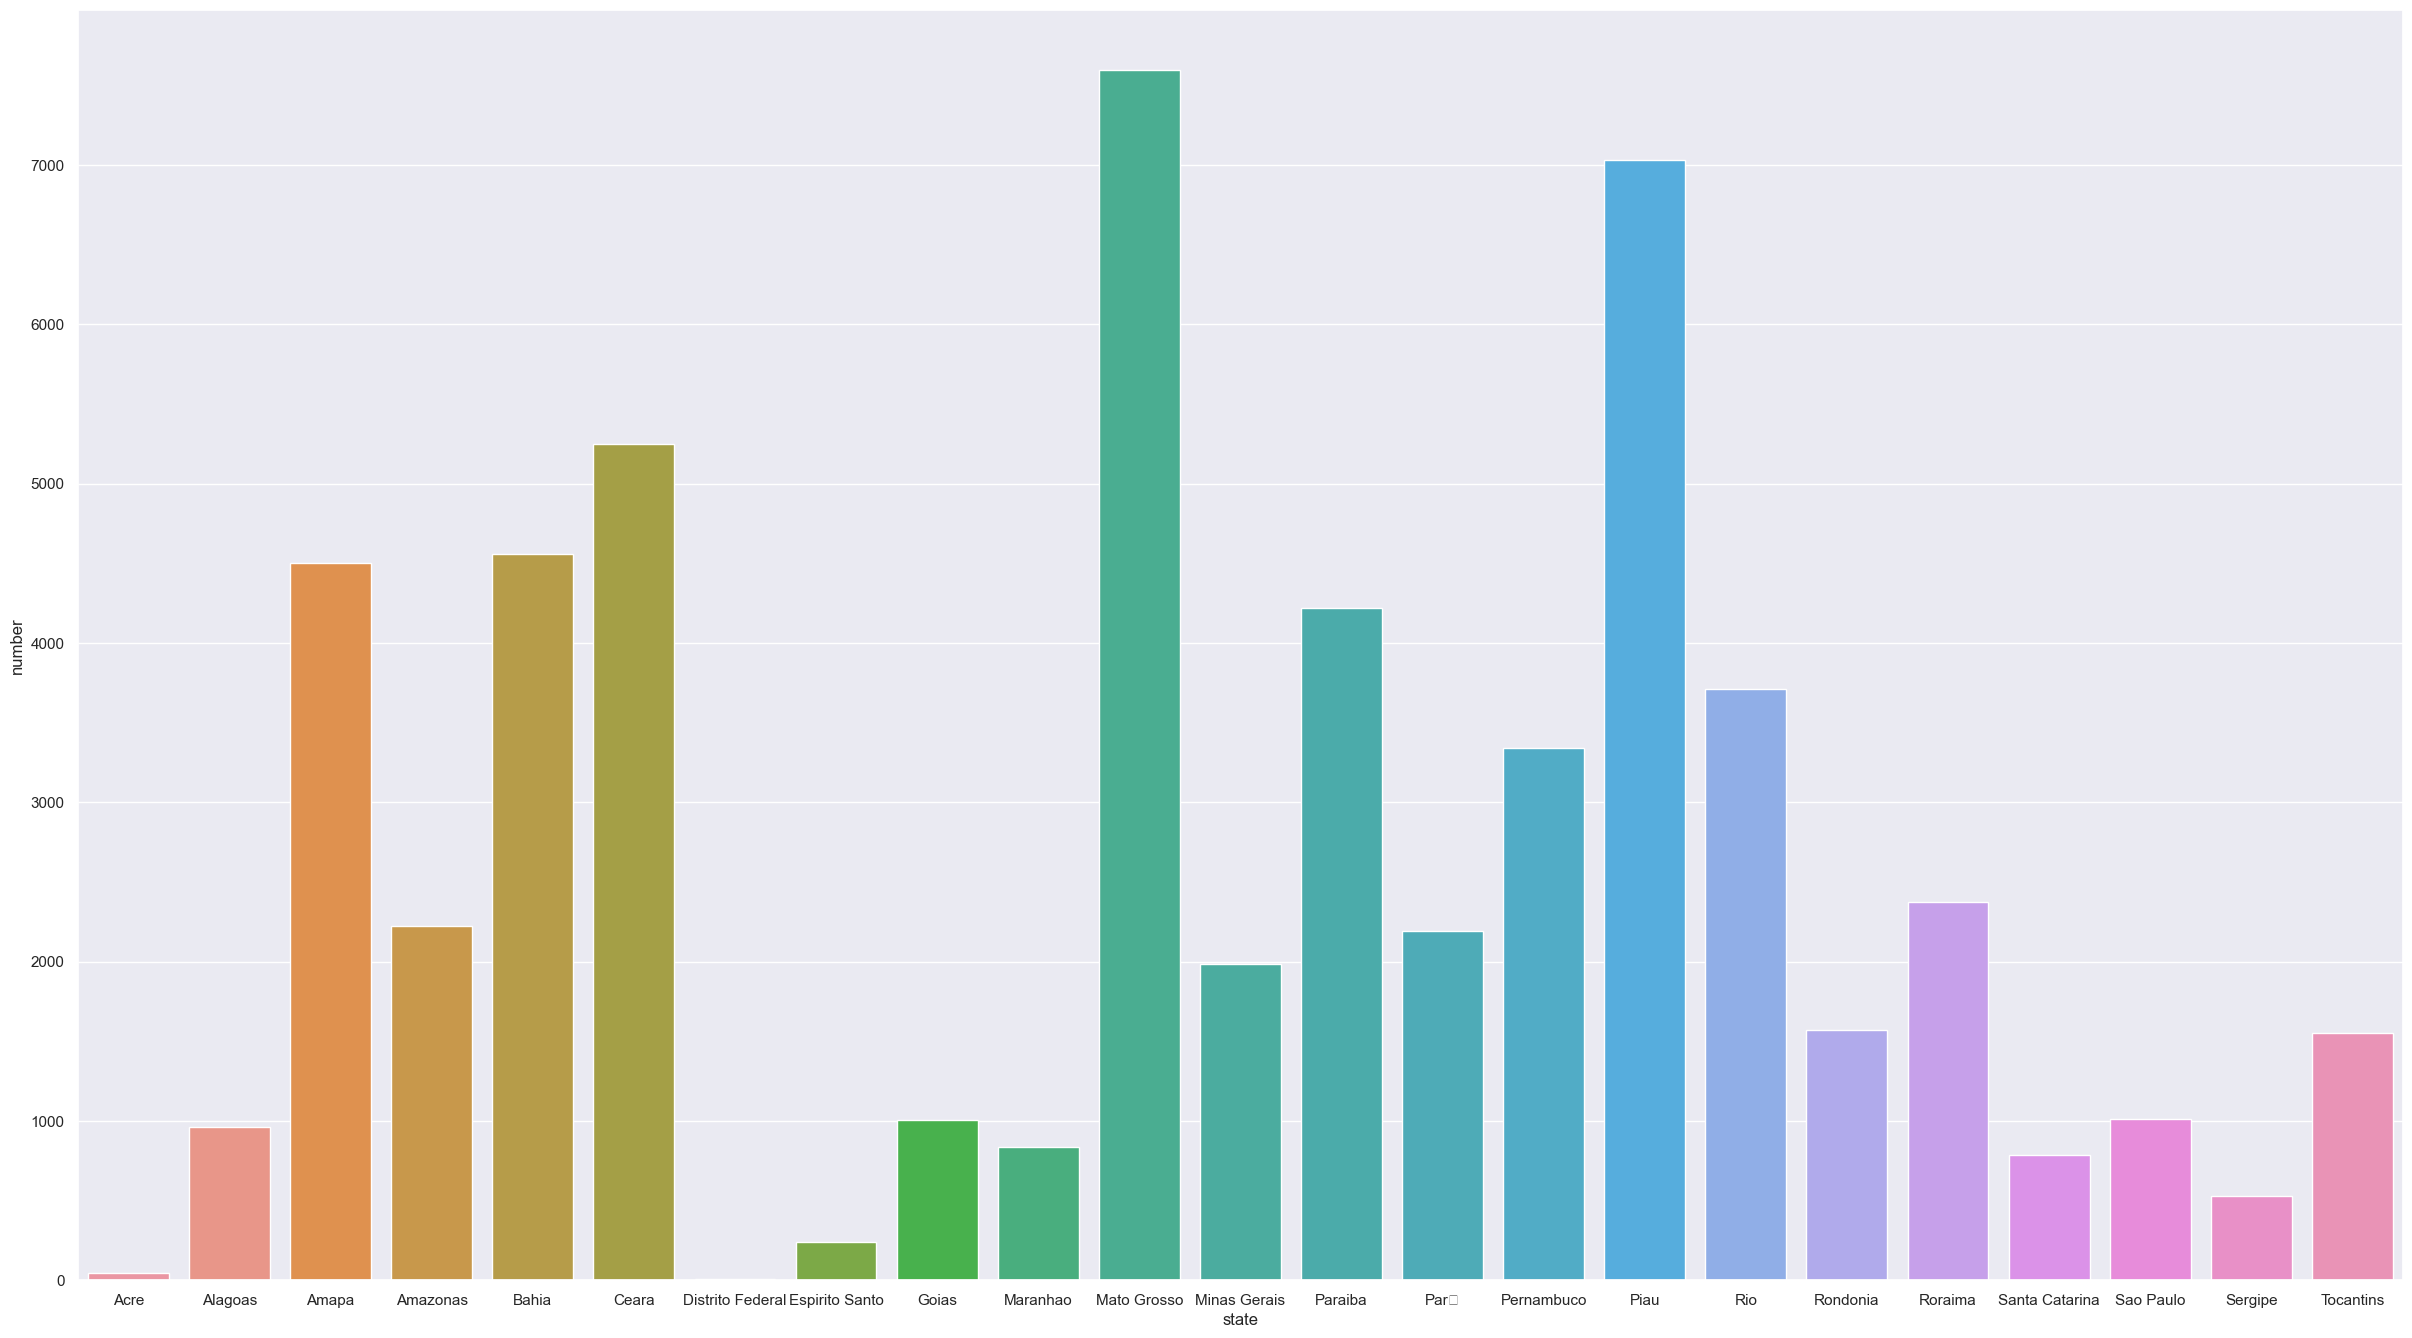

In [26]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=dec_data, x="state", y="number")

Personal Insights

In [27]:
ff_df

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01


In [28]:
state_month_data = ff_df.groupby(by=["state", "month"], as_index=False)["number"].sum()
state_month_data

,state,month,number
0,Acre,April,41.000
1,Acre,August,6393.034
2,Acre,December,47.000
3,Acre,February,19.000
4,Acre,January,40.000
...,...,...,...
271,Tocantins,March,912.000
272,Tocantins,May,5676.000
273,Tocantins,November,5176.000
274,Tocantins,October,1443.419


<AxesSubplot: xlabel='state', ylabel='number'>

C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


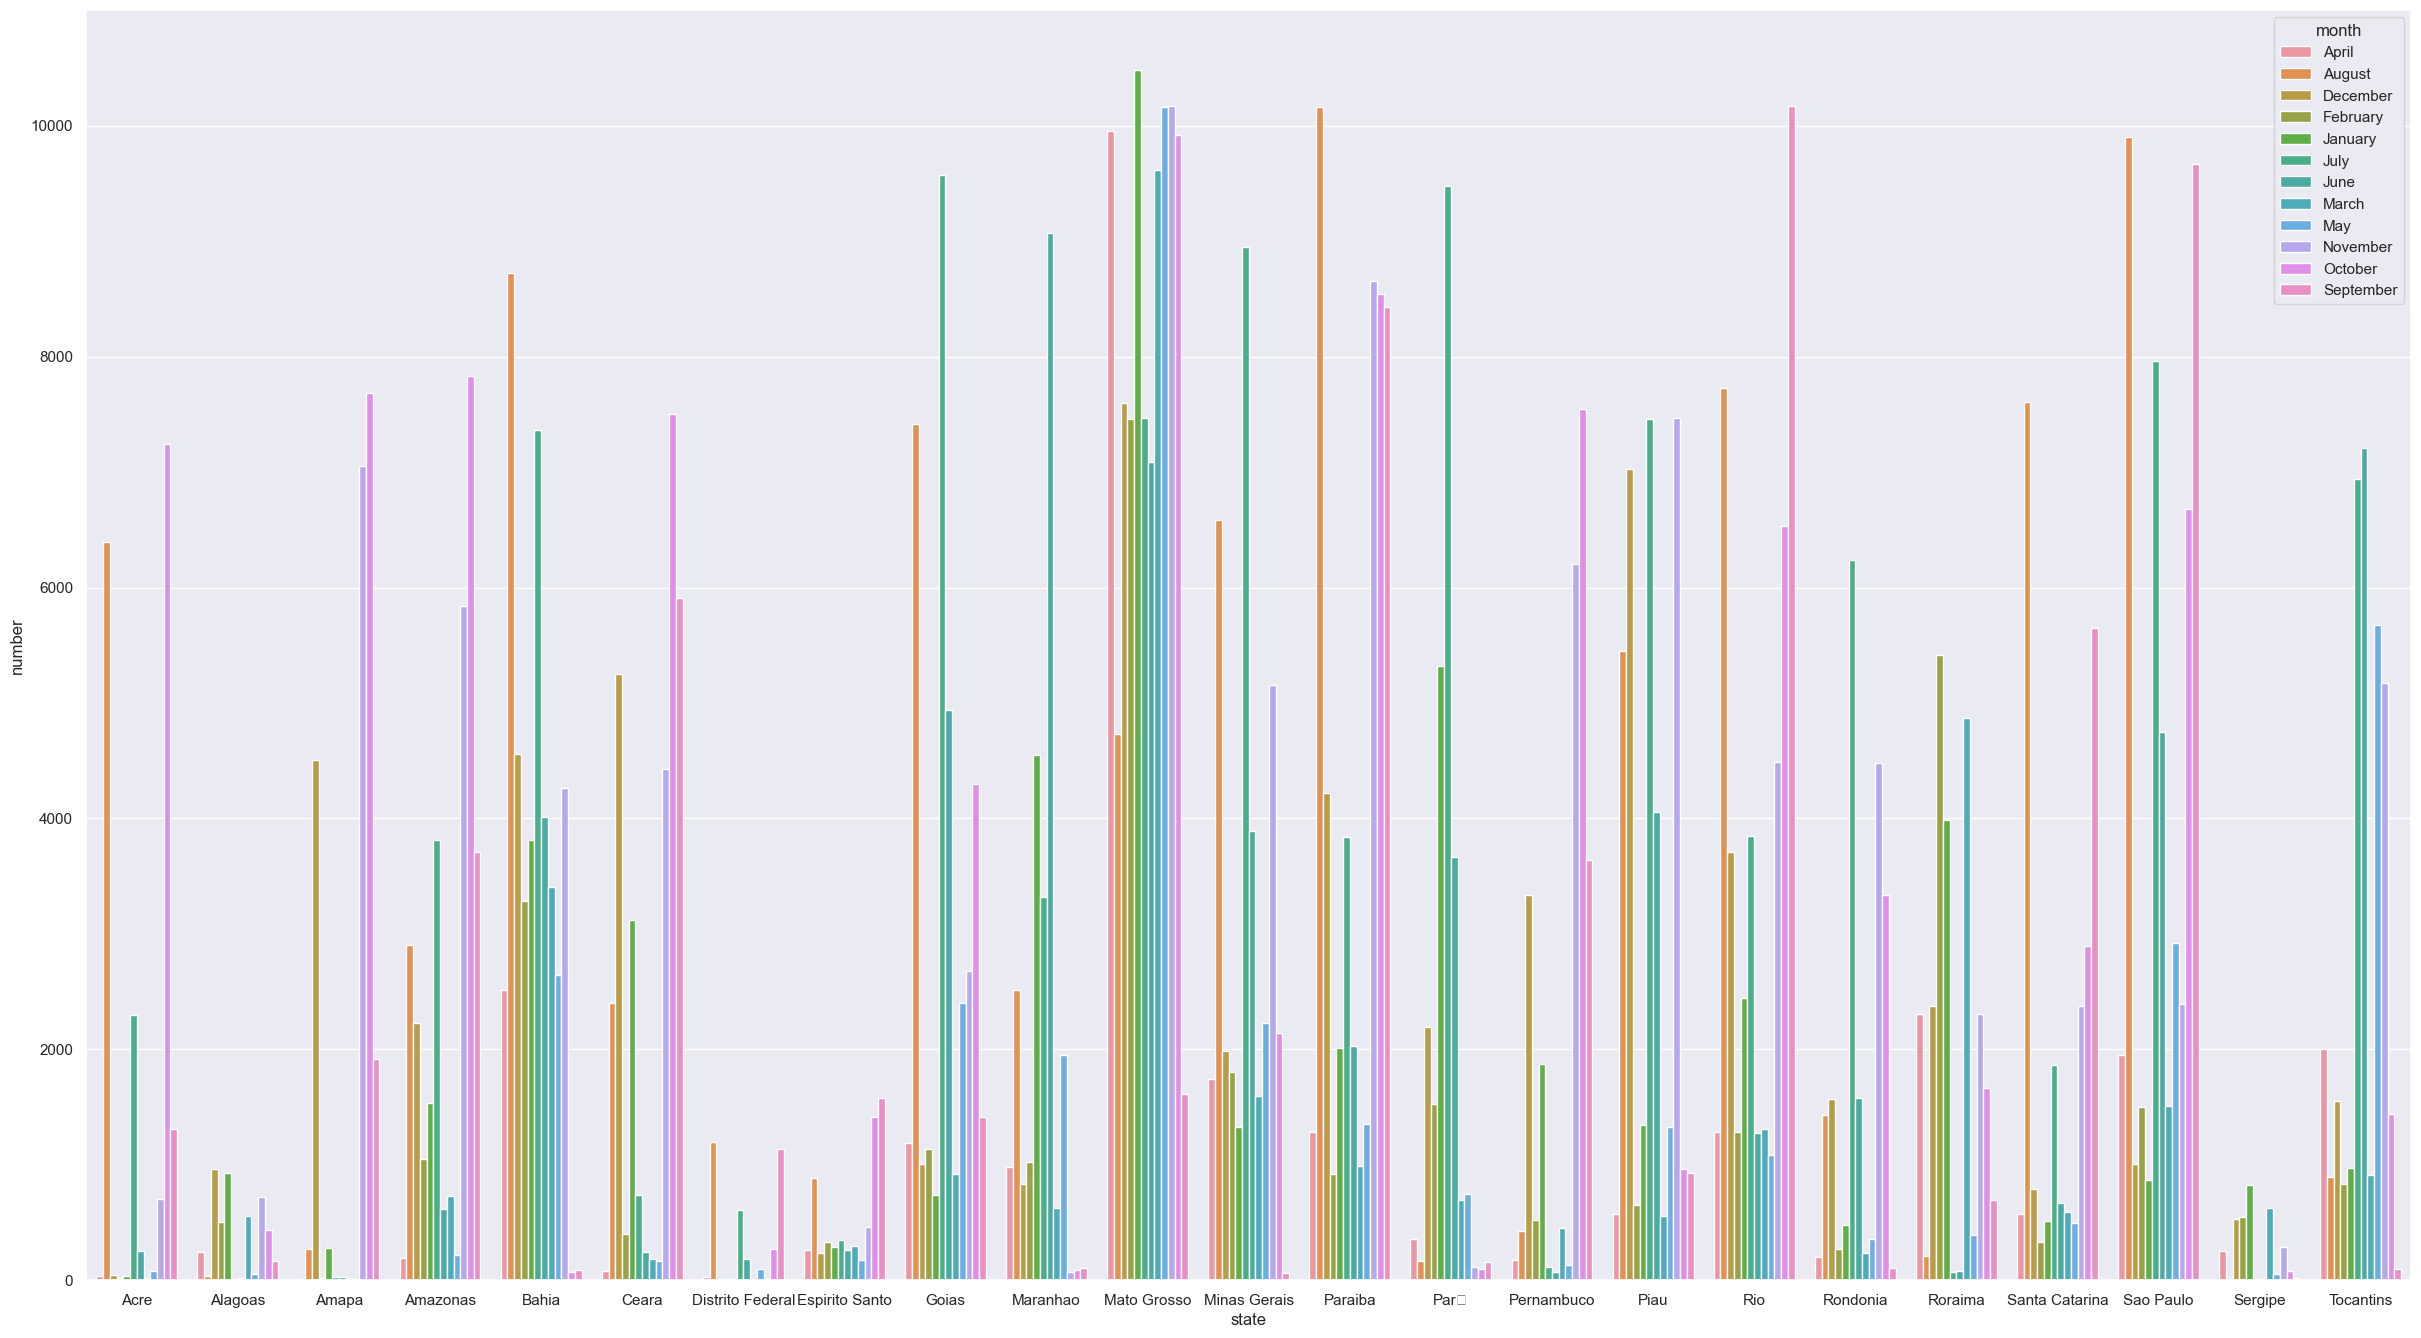

In [30]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=state_month_data, x="state", y="number", hue="month")

In [31]:
avg_state = ff_df.groupby(by="state", as_index=False)["number"].mean()
avg_state

,state,number
0,Acre,77.255356
1,Alagoas,19.350000
2,Amapa,91.345506
3,Amazonas,128.243218
4,Bahia,187.222703
5,Ceara,127.314071
6,Distrito Federal,14.899582
7,Espirito Santo,27.389121
8,Goias,157.721841
9,Maranhao,105.142808


<AxesSubplot: xlabel='state', ylabel='number'>

C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  func(*args, **kwargs)
C:\Users\eddieredmann3\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


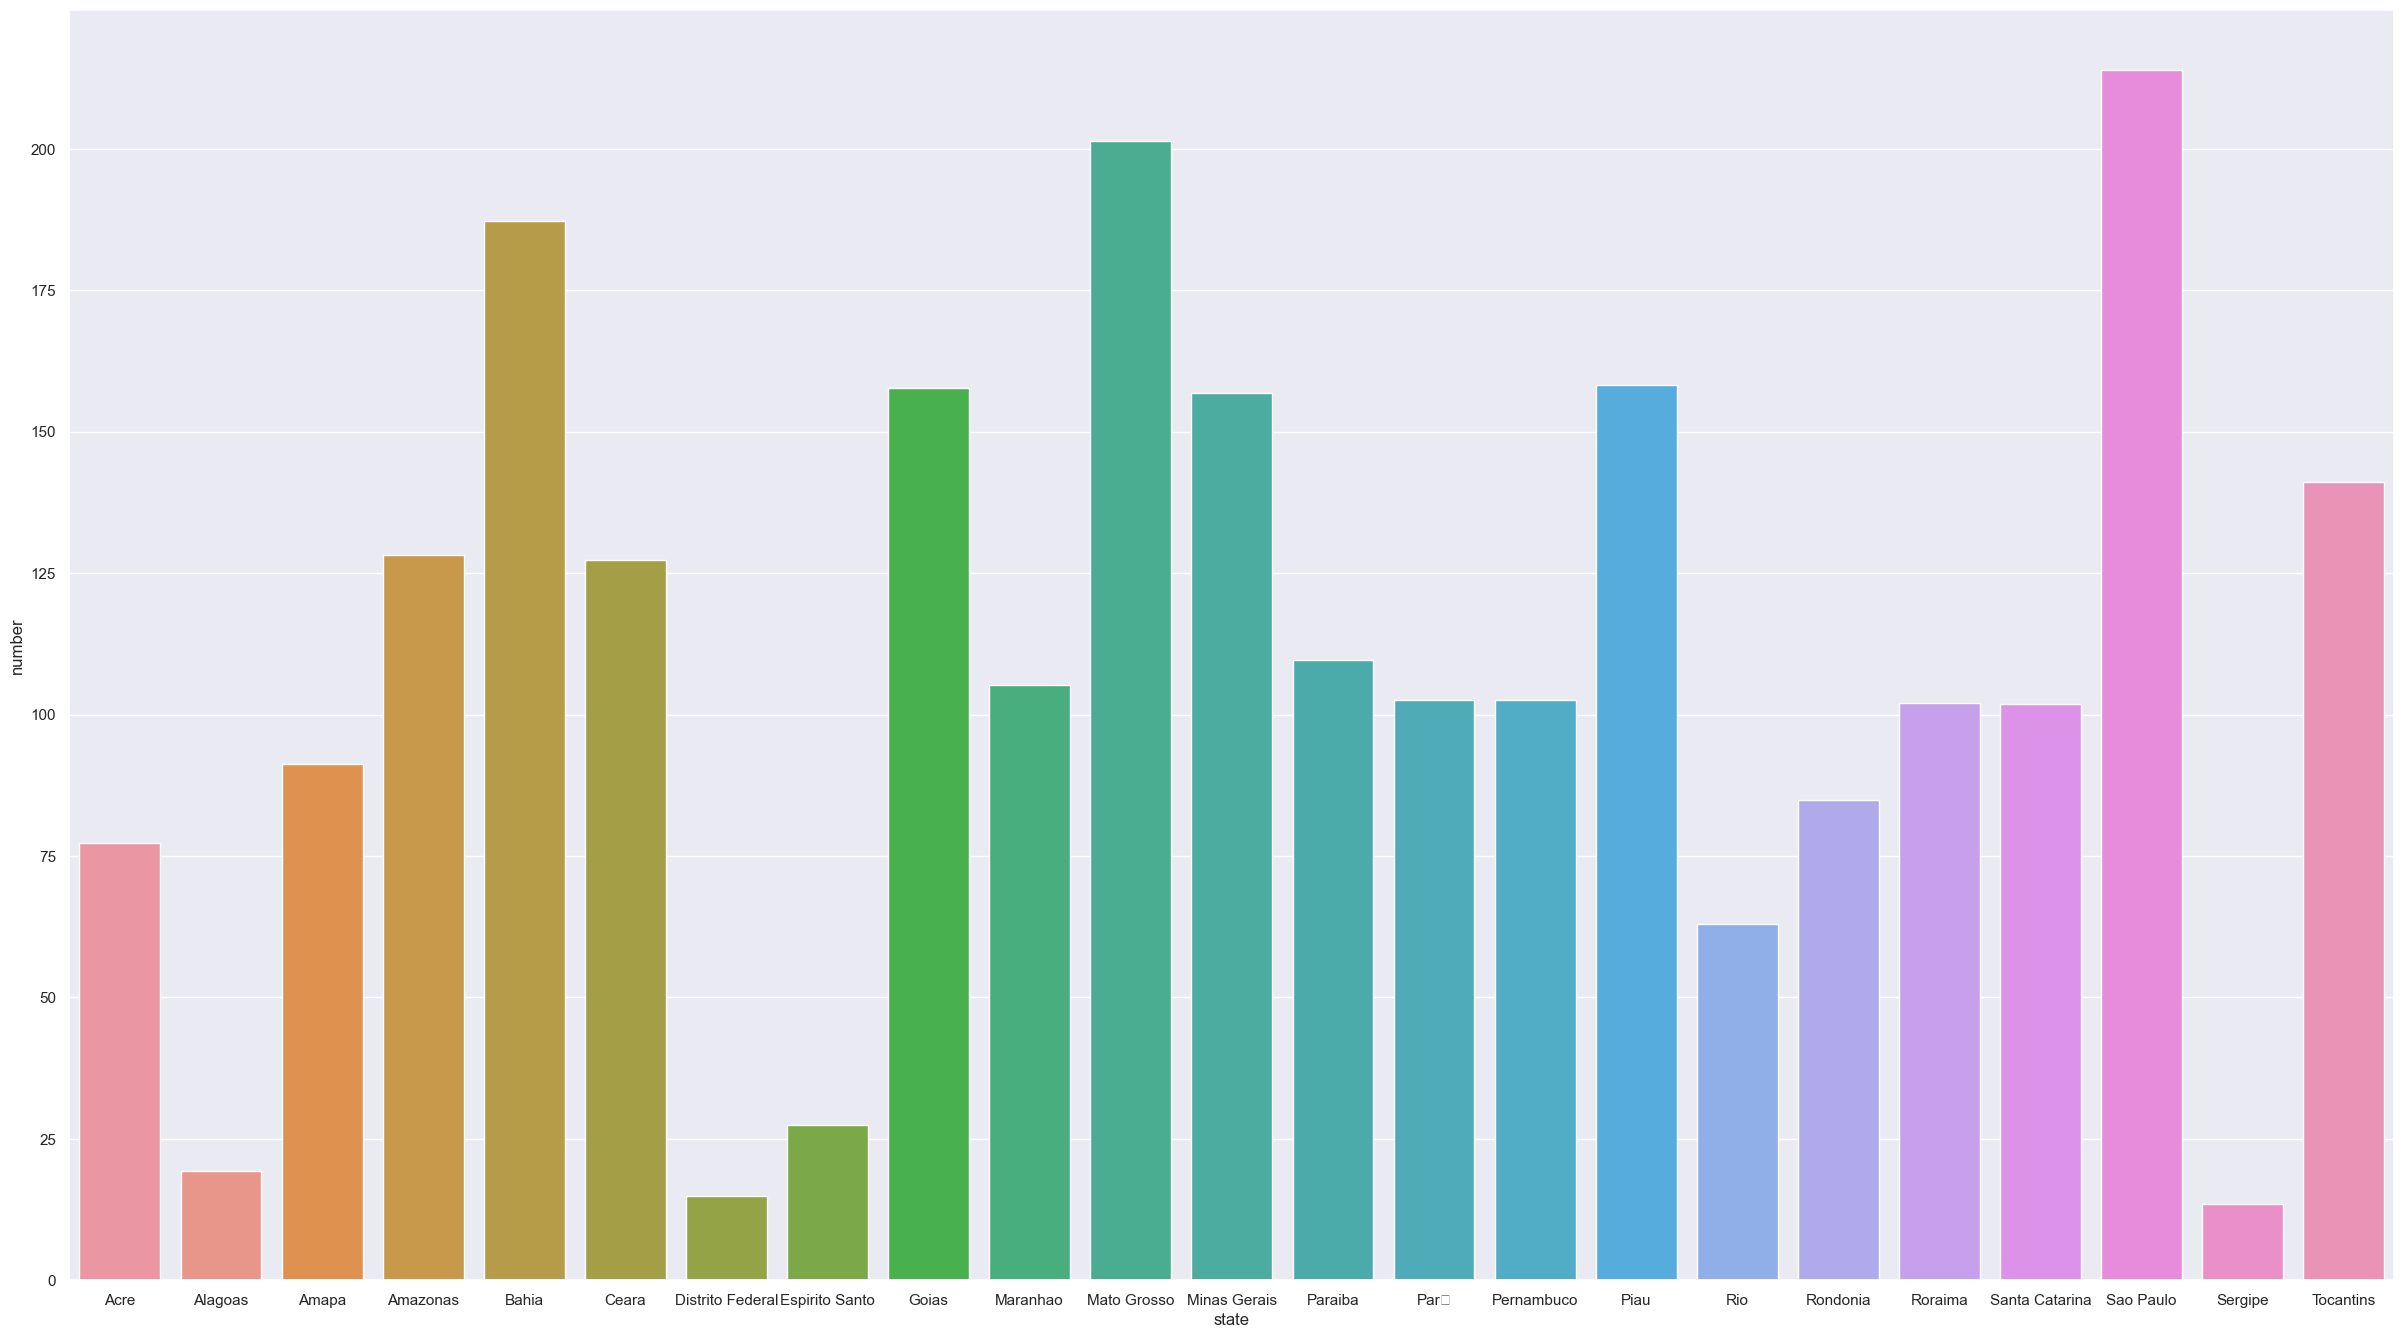

In [32]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=avg_state, x="state", y="number")

In [33]:
avg_month = ff_df.groupby(by="month", as_index=False)["number"].mean()
avg_month

,month,number
0,April,52.201426
1,August,163.056361
2,December,112.154932
3,February,57.126019
4,January,88.258492
5,July,170.974283
6,June,103.723472
7,March,56.884083
8,May,64.317339
9,November,158.348248


<AxesSubplot: xlabel='month', ylabel='number'>

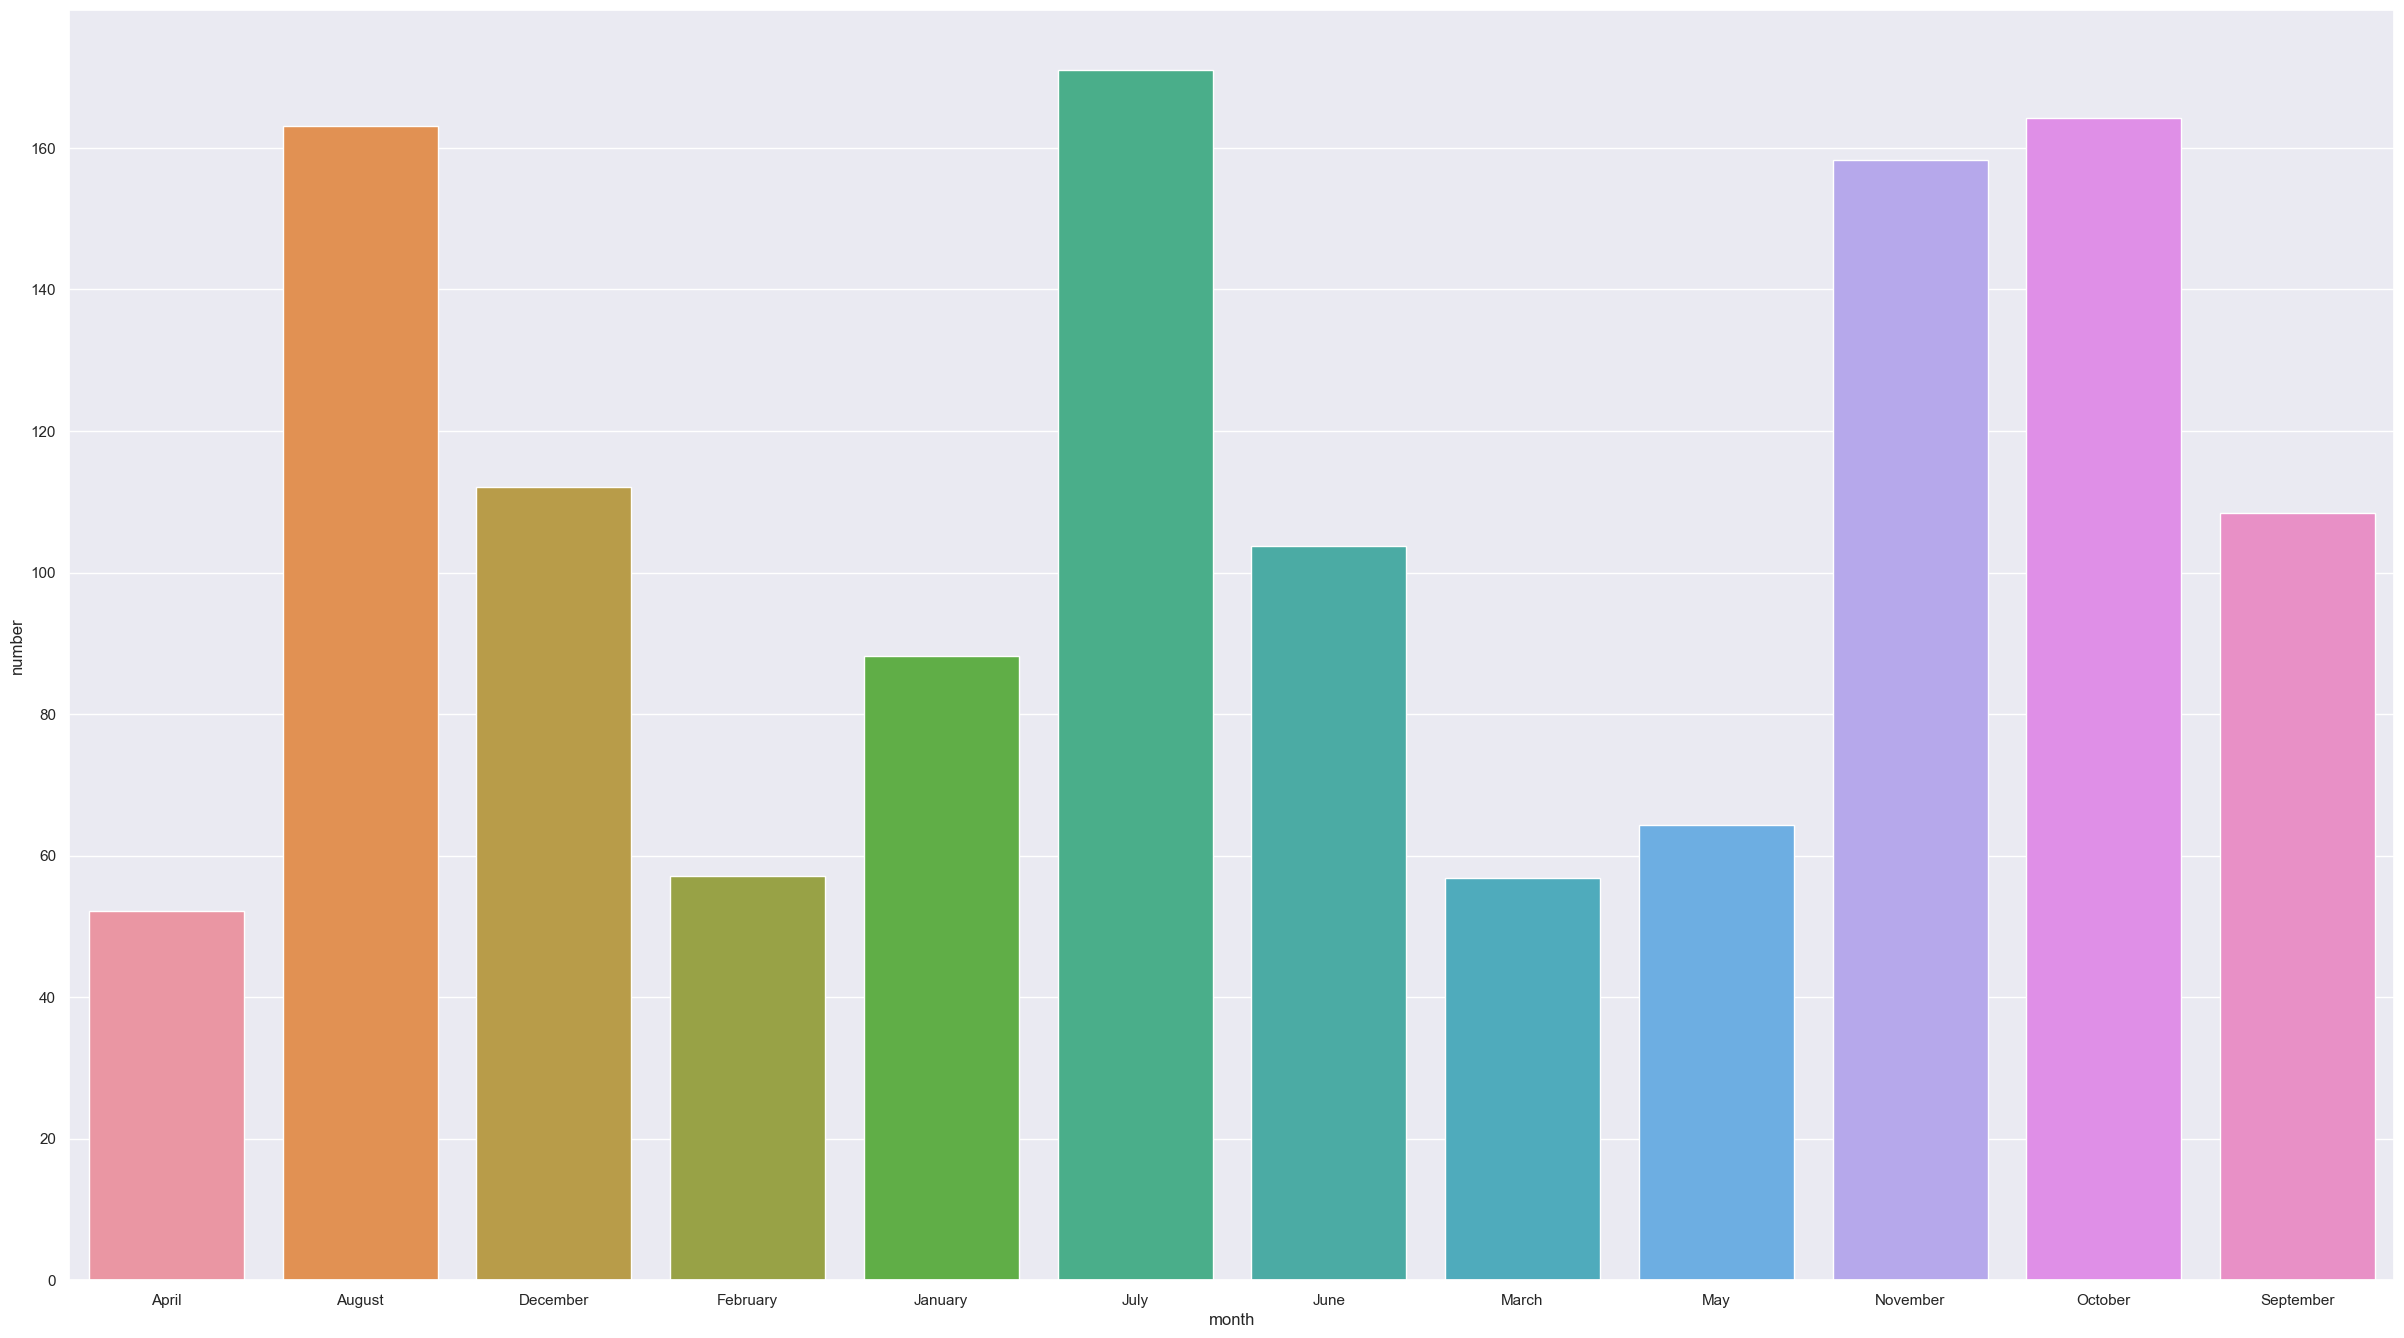

In [34]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=avg_month, x="month", y="number")

In [35]:
avg_year = ff_df.groupby(by="year", as_index=False)["number"].mean()
avg_year

,year,number
0,1998,61.771515
1,1999,82.971670
2,2000,84.417441
3,2001,89.727198
4,2002,115.403086
5,2003,131.977389
6,2004,118.682602
7,2005,108.040015
8,2006,104.420250
9,2007,101.967324


<AxesSubplot: xlabel='year', ylabel='number'>

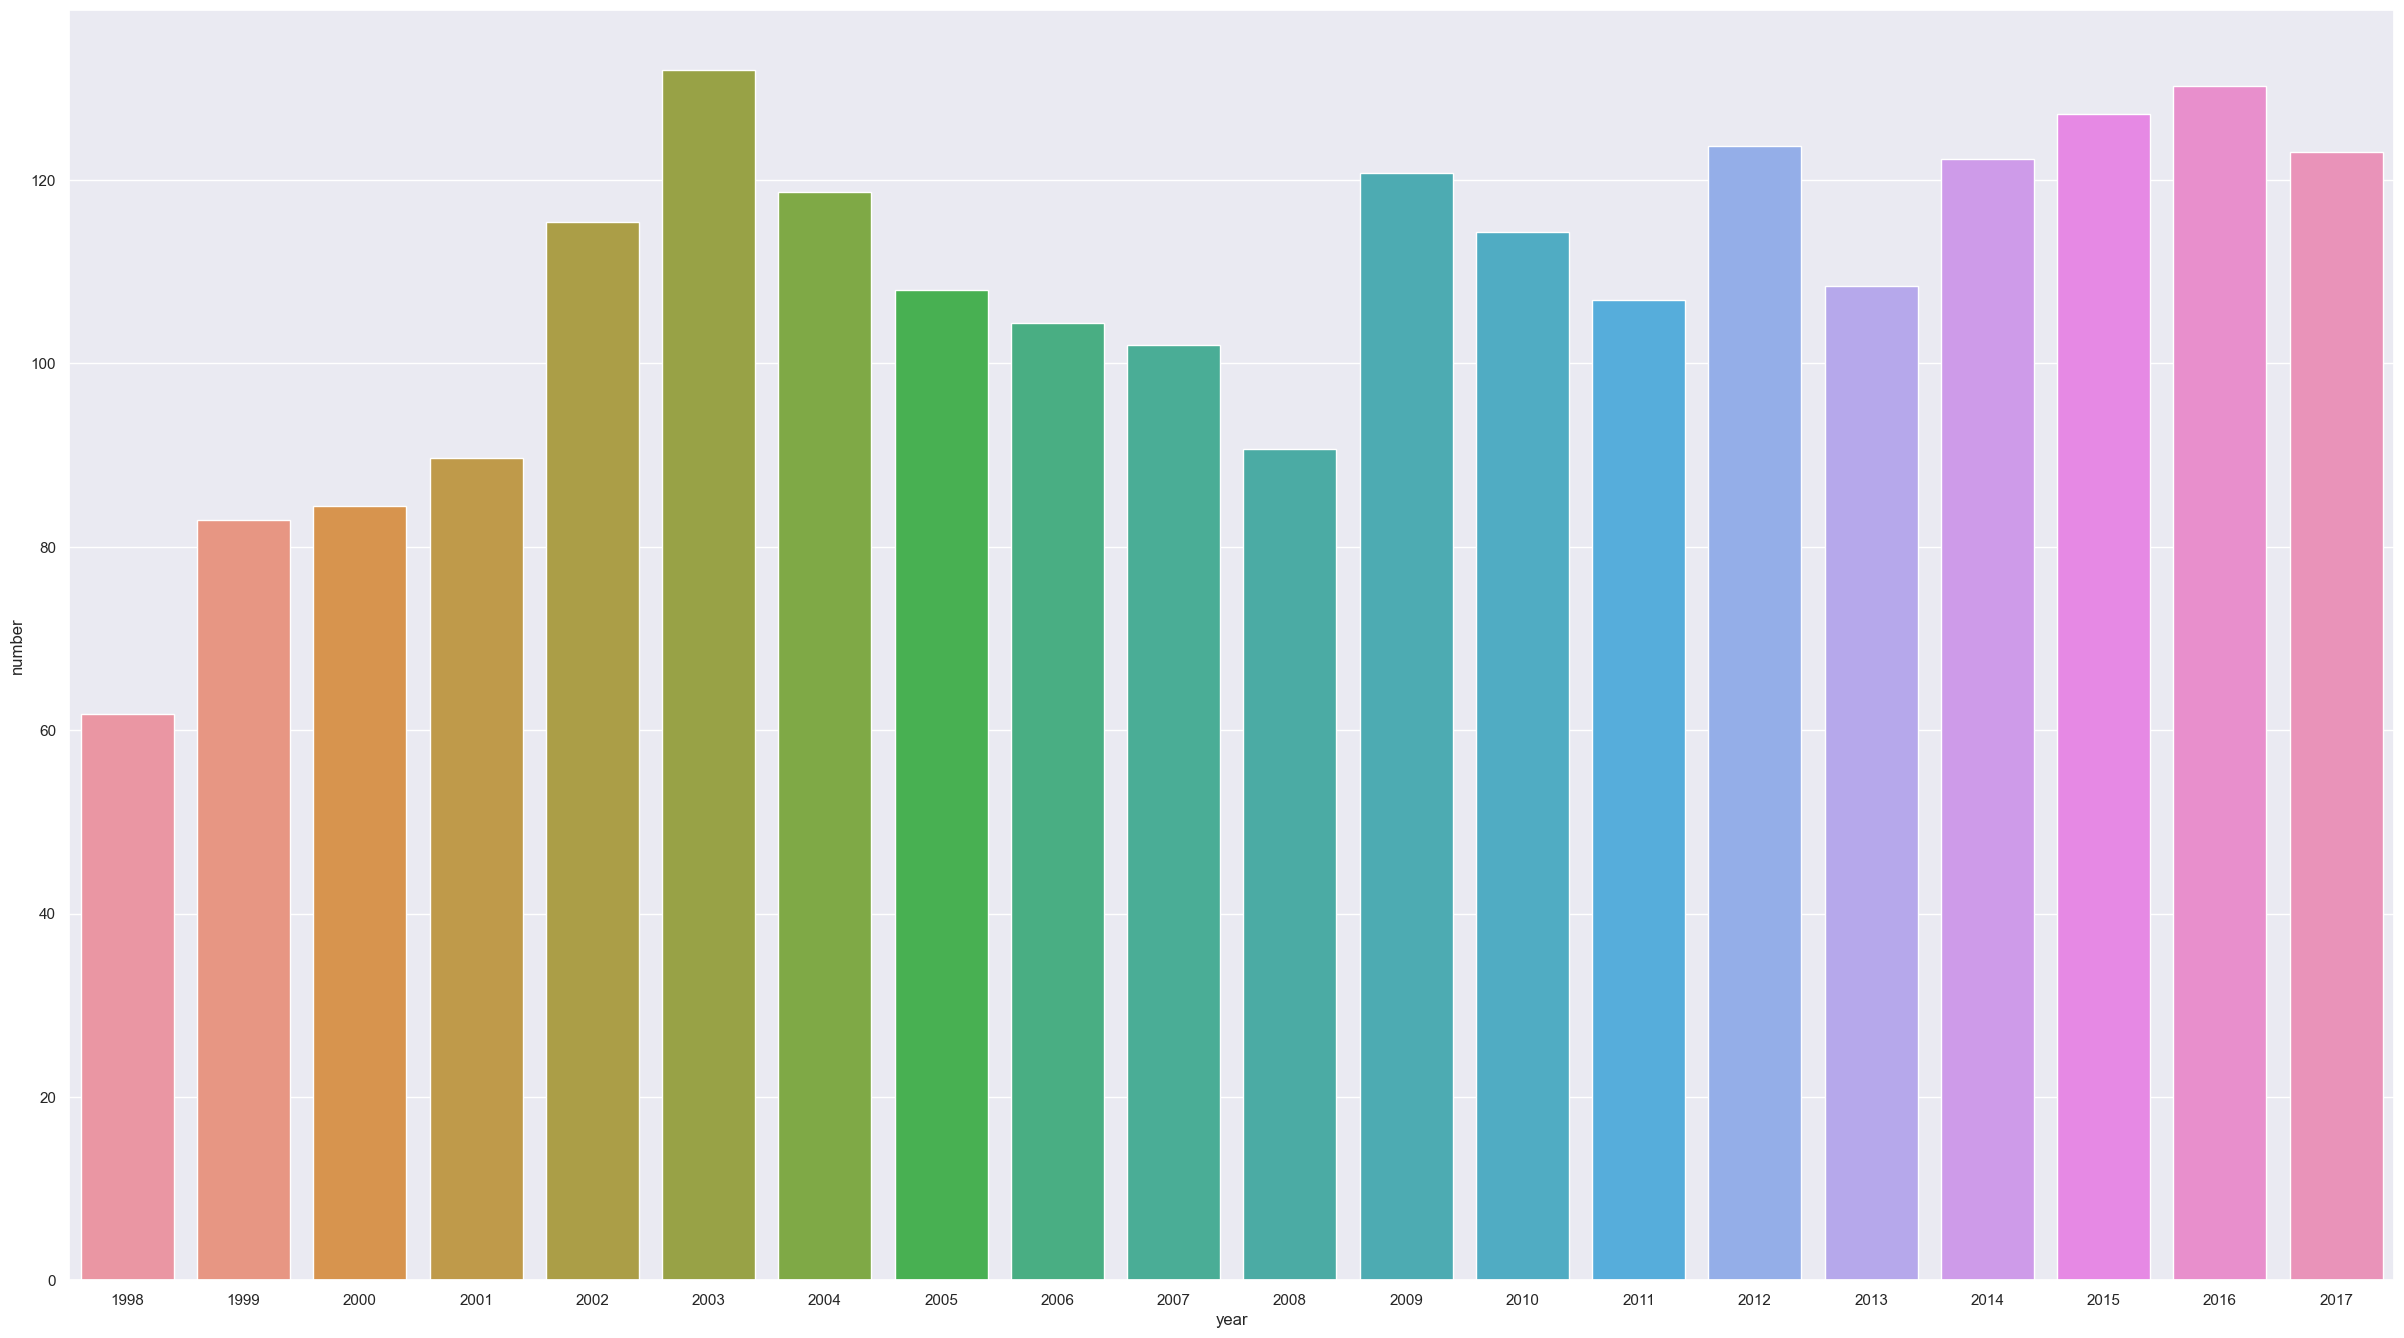

In [36]:
sns.set(rc={"figure.figsize":(30, 16.5)})
sns.barplot(data=avg_year, x="year", y="number")